cluster 결과 plot

    cluster  home_pitcher_era  away_pitcher_era  home_pitcher_war  \
0         1              2.94              3.52               3.0   
1         1              4.38              2.43               2.7   
2         1              3.83              2.16               4.1   
3         2              3.50              4.37               2.9   
4         2              2.39              4.41               2.7   
5         1              2.39              4.02               3.4   
6         1              2.15              2.76               2.4   
7         0              4.17              2.24               4.0   
8         1              3.50              3.71               2.2   
9         0              3.77              3.10               4.5   
10        1              2.05              2.31               3.9   
11        0              4.42              3.24               2.5   
12        0              4.08              2.09               2.0   
13        2              2.53     

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL

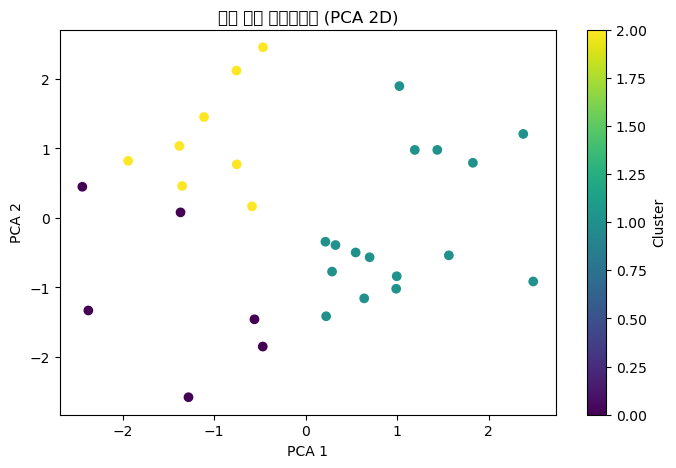

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 무작위로 30개 데이터 생성
np.random.seed(42)
n_samples = 30

test_data = pd.DataFrame({
    'home_pitcher_era': np.round(np.random.uniform(2.0, 4.5, n_samples), 2),
    'away_pitcher_era': np.round(np.random.uniform(2.0, 4.5, n_samples), 2),
    'home_pitcher_war': np.round(np.random.uniform(2.0, 4.5, n_samples), 1),
    'away_pitcher_war': np.round(np.random.uniform(2.0, 4.5, n_samples), 1),
    'home_batting_avg': np.round(np.random.uniform(0.25, 0.30, n_samples), 3),
    'away_batting_avg': np.round(np.random.uniform(0.25, 0.30, n_samples), 3),
    'winrate_diff': np.round(np.random.choice(
        np.concatenate([
            np.random.uniform(-0.3, -0.1, n_samples // 2),
            np.random.uniform(0.1, 0.3, n_samples // 2)
        ]), n_samples, replace=False), 2)
})


features = [
    'home_pitcher_era', 'away_pitcher_era',
    'home_pitcher_war', 'away_pitcher_war',
    'home_batting_avg', 'away_batting_avg',
    'winrate_diff'
]

X = test_data[features]

# 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
test_data['cluster'] = kmeans.fit_predict(X_scaled)

# 결과 확인
print(test_data[['cluster'] + features])

# 클러스터별 평균 특성 확인
cluster_summary = test_data.groupby('cluster')[features].mean()
print("\n📊 클러스터별 평균 특성:\n", cluster_summary)

# PCA 시각화
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=test_data['cluster'], cmap='viridis')
plt.title("경기 유형 클러스터링 (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()


KMeans

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. 학습용 데이터
data = pd.DataFrame({
    'home_pitcher_era': [2.15, 3.21, 3.85, 4.10, 2.95, 3.50, 3.33, 2.80, 3.70, 4.25],
    'away_pitcher_era': [3.42, 2.98, 4.20, 3.75, 3.90, 3.10, 2.95, 3.60, 3.55, 4.00],
    'home_pitcher_war': [4.1, 2.5, 3.0, 2.8, 3.3, 2.9, 3.2, 3.8, 2.7, 3.1],
    'away_pitcher_war': [3.3, 4.0, 2.7, 3.6, 2.8, 3.5, 3.0, 2.9, 3.2, 2.6],
    'home_batting_avg': [0.287, 0.271, 0.265, 0.280, 0.290, 0.275, 0.268, 0.282, 0.260, 0.277],
    'away_batting_avg': [0.261, 0.290, 0.255, 0.278, 0.265, 0.285, 0.270, 0.276, 0.274, 0.263],
    'winrate_diff': [0.18, -0.25, 0.15, -0.27, 0.12, 0.22, -0.20, 0.30, -0.18, 0.13]  # -0.3~-0.1 or 0.1~0.3
})

features = [
    'home_pitcher_era', 'away_pitcher_era',
    'home_pitcher_war', 'away_pitcher_war',
    'home_batting_avg', 'away_batting_avg'
]

# 2. 스케일링 및 클러스터링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])

kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# 3. 클러스터별 평균 승률 차이
cluster_winrate_map = data.groupby('cluster')['winrate_diff'].mean().to_dict()

# 4. 예측 함수
def predict_winrate_by_cluster(input_df: pd.DataFrame):
    input_scaled = scaler.transform(input_df[features])
    clusters = kmeans.predict(input_scaled)
    winrate_diffs = pd.Series(clusters).map(cluster_winrate_map)

    # 홈팀과 원정팀 승률 계산 (0.5 기준)
    home_winrate = (winrate_diffs + 1) / 2
    away_winrate = 1 - home_winrate

    result_df = input_df.copy()
    result_df['cluster'] = clusters
    result_df['home_winrate'] = home_winrate
    result_df['away_winrate'] = away_winrate

    return result_df[['home_winrate', 'away_winrate', 'cluster']]

# 5. 새로운 경기 예측 예시
new_games = pd.DataFrame({
    'home_pitcher_era': [3.10, 2.85, 3.70, 4.20, 3.30, 2.95, 3.60, 3.05, 4.00, 3.25],
    'away_pitcher_era': [3.50, 3.10, 2.90, 3.80, 3.60, 4.05, 3.20, 3.45, 3.15, 3.75],
    'home_pitcher_war': [3.5, 4.2, 3.0, 2.6, 3.3, 4.0, 2.9, 3.8, 2.7, 3.4],
    'away_pitcher_war': [2.8, 3.0, 4.1, 3.5, 2.9, 2.7, 3.4, 3.1, 3.9, 3.2],
    'home_batting_avg': [0.278, 0.285, 0.270, 0.265, 0.290, 0.275, 0.282, 0.288, 0.267, 0.280],
    'away_batting_avg': [0.273, 0.260, 0.285, 0.280, 0.268, 0.275, 0.276, 0.264, 0.283, 0.272]
})

# 예측 실행
predicted_winrates = predict_winrate_by_cluster(new_games)
print(predicted_winrates)


   home_winrate  away_winrate  cluster
0        0.6000        0.4000        1
1        0.6000        0.4000        1
2        0.4925        0.5075        2
3        0.3650        0.6350        0
4        0.6000        0.4000        1
5        0.6000        0.4000        1
6        0.3650        0.6350        0
7        0.6000        0.4000        1
8        0.4925        0.5075        2
9        0.6000        0.4000        1


c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


회귀 기반 개선 예시 (RandomForestRegressor 사용)


In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 1. 데이터
np.random.seed(42)
n_samples = 30

data = pd.DataFrame({
    'home_pitcher_era': np.round(np.random.uniform(2.0, 4.5, n_samples), 2),
    'away_pitcher_era': np.round(np.random.uniform(2.0, 4.5, n_samples), 2),
    'home_pitcher_war': np.round(np.random.uniform(2.0, 4.5, n_samples), 1),
    'away_pitcher_war': np.round(np.random.uniform(2.0, 4.5, n_samples), 1),
    'home_batting_avg': np.round(np.random.uniform(0.25, 0.30, n_samples), 3),
    'away_batting_avg': np.round(np.random.uniform(0.25, 0.30, n_samples), 3),
    'winrate_diff': np.round(np.random.choice(
        np.concatenate([
            np.random.uniform(-0.3, -0.1, n_samples // 2),
            np.random.uniform(0.1, 0.3, n_samples // 2)
        ]), n_samples, replace=False), 2)
})

features = [
    'home_pitcher_era', 'away_pitcher_era',
    'home_pitcher_war', 'away_pitcher_war',
    'home_batting_avg', 'away_batting_avg'
]

# 2. 회귀 모델 학습 (스케일러 포함 파이프라인)
model = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(data[features], data['winrate_diff'])

# 3. 예측 함수 정의
def predict_winrate(input_df: pd.DataFrame):
    predicted_diff = model.predict(input_df[features])

    # 예측된 승률 차이로부터 홈/원정 승률 계산
    home_winrate = (predicted_diff + 1) / 2
    away_winrate = 1 - home_winrate

    result_df = input_df.copy()
    result_df['predicted_winrate_diff'] = predicted_diff
    result_df['home_winrate'] = home_winrate
    result_df['away_winrate'] = away_winrate

    return result_df[['predicted_winrate_diff', 'home_winrate', 'away_winrate']]

# 4. 새로운 경기 예측
new_games = pd.DataFrame({
    'home_pitcher_era': [3.10, 2.85, 3.70, 4.20, 3.30, 2.95, 3.60, 3.05, 4.00, 3.25],
    'away_pitcher_era': [3.50, 3.10, 2.90, 3.80, 3.60, 4.05, 3.20, 3.45, 3.15, 3.75],
    'home_pitcher_war': [3.5, 4.2, 3.0, 2.6, 3.3, 4.0, 2.9, 3.8, 2.7, 3.4],
    'away_pitcher_war': [2.8, 3.0, 4.1, 3.5, 2.9, 2.7, 3.4, 3.1, 3.9, 3.2],
    'home_batting_avg': [0.278, 0.285, 0.270, 0.265, 0.290, 0.275, 0.282, 0.288, 0.267, 0.280],
    'away_batting_avg': [0.273, 0.260, 0.285, 0.280, 0.268, 0.275, 0.276, 0.264, 0.283, 0.272]
})

predicted = predict_winrate(new_games)
print(predicted)


   predicted_winrate_diff  home_winrate  away_winrate
0                 -0.0342       0.48290       0.51710
1                  0.0106       0.50530       0.49470
2                 -0.1725       0.41375       0.58625
3                 -0.1877       0.40615       0.59385
4                  0.0237       0.51185       0.48815
5                  0.0005       0.50025       0.49975
6                 -0.1580       0.42100       0.57900
7                  0.0008       0.50040       0.49960
8                 -0.2045       0.39775       0.60225
9                 -0.0500       0.47500       0.52500
